<a href="https://colab.research.google.com/github/ashokkondhalkar/CAPSTONE-1-Hotel-Booking-Analysis-EDA/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing all neccesary python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Mount drive
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Providing file path & we are using pd.read_csv is used to load a CSV file as a pandas dataframe
file_path="/content/drive/MyDrive/AlmaBetter/Modules/ Topic/CAPSTONE-1-Hotel-Booking-Analysis-EDA/Hotel Bookings.csv"
hotel_df=pd.read_csv(file_path)

#Reading and Inspection

In [4]:
# .head() function in Python displays the first five rows of the dataframe by default
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# .shape function shows DataFrame is made up of 119390 rows and 32 columns of data.
hotel_df.shape

(119390, 32)

In [6]:
# .columns() function in Python displays the number of columns present in DataFrame   
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# .describe() function in Python Provides information about statistical aspects of the DataFrame.This work only for numerical columns
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# .info() function Provides information about Dtype
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Lets Do Data Cleaning

In [9]:
#checking missing value in columns

In [10]:
#.isna() or .isnull() function gives information about null values
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#We are Try to find Null values across all columns and we replace with appropriate value
#DataFrame having 32 columns like 'children', 'company', 'country' and 'agent' have some null values.

In [12]:
#If we want column wise percentage with 2 decimal places then we are using Round function in python
round(100*(hotel_df.isna().sum()/len(hotel_df.index)),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [13]:
#Lets make a copy of original DataFrame(Avoid any changes in original DataFrame)
hotel1=hotel_df.copy()

In [14]:
#lets find unique values if any
hotel1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
hotel1['is_canceled'].unique()

array([0, 1])

In [16]:
hotel1['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [17]:
#column childern having 0 as well as null values
hotel1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [18]:
hotel1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

1.Lets remove unnecessary dublicate Row 










In [19]:
hotel1.drop_duplicates(inplace = True)

In [20]:
hotel1[hotel1.duplicated()].shape

(0, 32)

In [21]:
hotel1.shape

(87396, 32)

2.Lets Handing missing values and Check for the wrong entry

In [22]:
#sort values in ascending order
hotel1.isnull().sum().sort_values(ascending = True)

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


In [23]:
#sort values in decending order
hotel1.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [24]:
#checking company having nan values
print(hotel1['company'].unique()) 

#checking agent having nan values
print(hotel1['agent'].unique())

#checking children having nan values
print(hotel1['children'].unique())

#To ensure there should be have unique value for required data set 
#so,we apply filter to check data

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [25]:
#For better calculation need to replace null values by 0 
hotel1['company'] = hotel1['company'].fillna(0)
hotel1['agent'] = hotel1['agent'].fillna(0)

#For better calculation need to replace nan values by its mean 
hotel1['children'].fillna(hotel1['children'].mean(),inplace=True)

print(hotel1['country'].isna().sum())

452


In [26]:
#only 'country' is remaing having null value so replace null value with 'some'
hotel1['country'].fillna('some',inplace=True)

#lets find if any null value remaing
hotel1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [27]:
#Now can see there is no  null value in column

3.Lets convert column to appropriate datatype

In [28]:
#convert float datatype to interger
hotel1['children']=hotel1['children'].astype('int64')
hotel1['agent']=hotel1['agent'].astype('int64')
hotel1['company']=hotel1['company'].astype('int64')

In [29]:
#Changing reservation_status_date to dataframe and store value in reservation_status_date

In [30]:
hotel1['reservation_status_date'] = pd.to_datetime(hotel1['reservation_status_date'], format = '%Y-%m-%d').dt.date

In [31]:
hotel1['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 87396, dtype: object

4.Lets create new columns



In [32]:
#making new column for total_stays days in hotel
print(hotel1['stays_in_week_nights'])
print(hotel1['stays_in_weekend_nights'])

0         0
1         0
2         1
3         1
4         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 87396, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: stays_in_weekend_nights, Length: 87396, dtype: int64


In [33]:
#Addition of two columns
hotel1['total_stay'] =hotel1['stays_in_week_nights']+hotel1['stays_in_weekend_nights']

In [34]:
#making new column totle_peoples by addition of babies,adults,children
print(hotel1['babies'])
print(hotel1['adults'])
print(hotel1['children'])

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: babies, Length: 87396, dtype: int64
0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 87396, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: children, Length: 87396, dtype: int64


In [35]:
#Addition of three columns 
hotel1['totle_peoples']=hotel1['babies']+hotel1['adults']+hotel1['children']

#EDA

In [36]:
#Lets first find the correlation between the numerical data

In [37]:
hotel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [38]:
'''let eliminate columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type.
 So no need correction for this data
 Also, we have added total_stay and total_peoples columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.
'''


"let eliminate columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type.\n So no need correction for this data\n Also, we have added total_stay and total_peoples columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.\n"

In [39]:
corel_df = hotel1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','totle_peoples']]


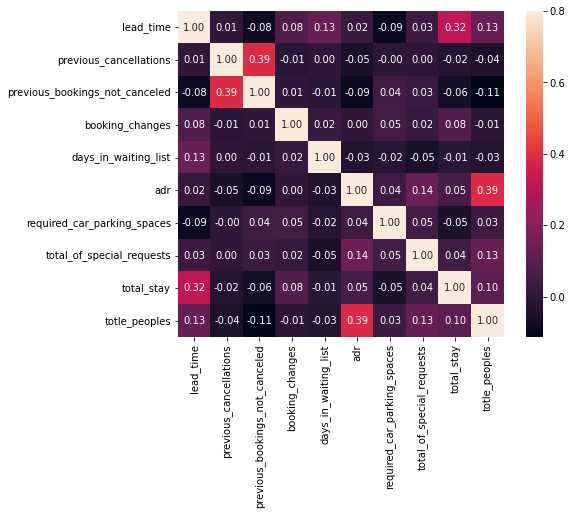

In [40]:
#Correlation matrix
cor_matrix = corel_df .corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cor_matrix,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

In [41]:
#Here adr is corelated with totle_peoples.if no peoples increases then revenue must be increses.so adr(average daily rate) will be more

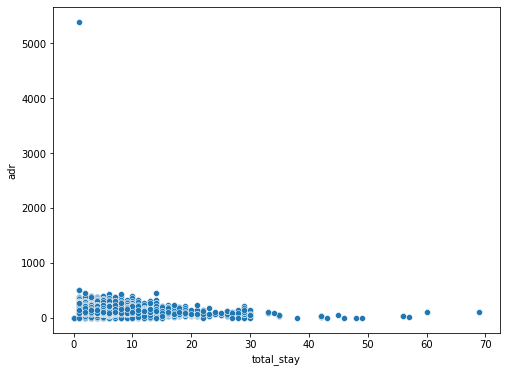

In [42]:
#Describing size for figure 
plt.figure(figsize = (8,6))

#Analysis by using scatterplot
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel1)
plt.show()

In [43]:
#Here we are just apply condition for better scatterplot
hotel1.drop(hotel1[hotel1['adr']>2000].index,inplace=True)

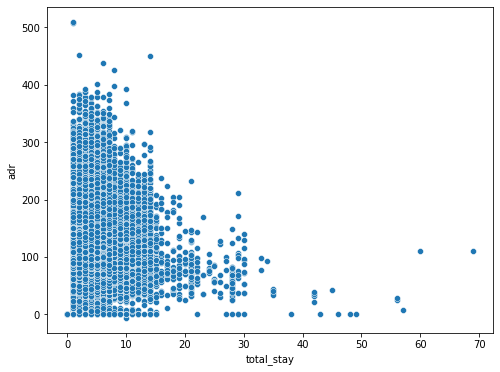

In [44]:
#Describe size for figure 
plt.figure(figsize = (8,6))

#Analysis by using scatterplot
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel1)
plt.show()

# **Now We Will Do Data Analysis and Visualization**

In [45]:
#Now there is situation,Someone new in hotel industry & he/she want to know information about Hotel because.so,he/she raised some questions about Hotel market.Thus,i need to analysis the data and answer them 

Q1)What are the type of hotel in market and percentage in each Type?

In [46]:
#Lets view data present in hotel column
hotel_df['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

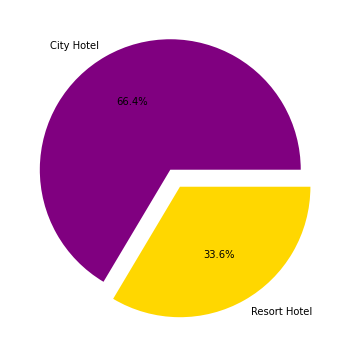

In [47]:
#Lets make pie chart to view percentage Resort Hotel & City Hotel percentage
#Provide size to pie chart
plt.rcParams['figure.figsize'] = (6,6)

#.value_counts() function counts value and .index gives name
pie_hotel=hotel_df['hotel'].value_counts().index

#Determine colors in pie chart
colors= ['purple', 'gold']

#Counts value between Resort Hotel and city Hotel 
pie_size = hotel_df['hotel'].value_counts()

#How much each section seprated from each other
gap= (0,0.15)

#Analysis by using pie chart
plt.pie(pie_size,explode=gap,labels=pie_hotel, colors=colors, autopct='%1.1f%%')
plt.show()

In [48]:
#According to Analysis city hotels are compairetively more than resort hotel.
#city hotel having 66.4% and Resort hotel having 33.6%  percentage in hotel market 
#Resort hotel shold me more expensive so,peoples are stick to city hotel

Q2)Which hotel has higher lead time and preferred stay in each hotel?

In [49]:
#Making group of hotel
hotel_group_leadtime=hotel1.groupby('hotel')['lead_time'].median().reset_index()
#Convert to DataFrame
pd.DataFrame(hotel_group_leadtime)

,hotel,lead_time
0,City Hotel,50.0
1,Resort Hotel,47.0


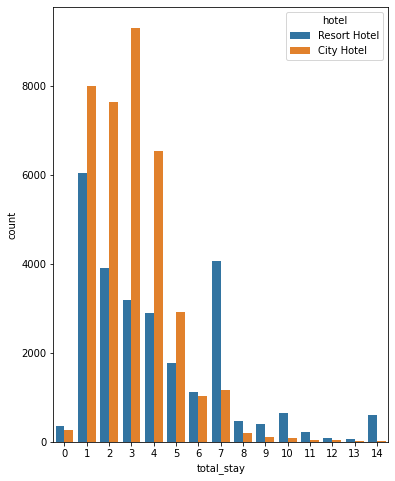

In [50]:
#Find hotel having zero calcelations
zero_cancel=hotel1[hotel1['is_canceled']==0]  
#If stay length greater than 15 days
condition=zero_cancel[zero_cancel['total_stay']<15]

#Determine figure size
plt.figure(figsize=(6,8))
sns.countplot(x=condition['total_stay'],hue=condition['hotel'])
plt.show()

In [51]:
#From above Analysis we found  that lead time of city hotel is more than Resort Hotel
#Resort hotel having longer stay compaired to city hotel.i.e.For short stay peoples are choose City Hotel

Q3) Find which hotel has higher bookings cancellation rate.

In [52]:
#Find hotel having cancellation
hotel_cancel=hotel1[hotel1['is_canceled']==1]  

#Make a group with hotel and count no of cancellation
hotel_cancel_group=(hotel_cancel.groupby('hotel').size())

#Convert to DataFrame and rename column 
x=pd.DataFrame(hotel_cancel_group).rename(columns = {0:'Totle cancelled bookings'})
x

,Totle cancelled bookings
hotel,
City Hotel,16048
Resort Hotel,7976


In [53]:
#Making group of hotel
make_group=hotel1.groupby('hotel') 

#Make a group with hotel and count totle no of bookings
totle_bookings=make_group.size()
totle_bookings

#convert to Dataframe and rename the column
y=pd.DataFrame(totle_bookings).rename(columns={0:'Totle bookings'})
y


,Totle bookings
hotel,
City Hotel,53427
Resort Hotel,33968


In [54]:
#Concat x & y with z
z=pd.concat([x,y],axis=1)
z

,Totle cancelled bookings,Totle bookings
hotel,,
City Hotel,16048,53427
Resort Hotel,7976,33968


In [55]:
#Calculate cancelled percentage
#Mathematical_formula:Percentage=(totle cancelled_bookins /totle bookings)*100

z['cancel_percentage']=round((z['Totle cancelled bookings']/z['Totle bookings'])*100,2)
z['cancel_percentage']

hotel
City Hotel      30.04
Resort Hotel    23.48
Name: cancel_percentage, dtype: float64

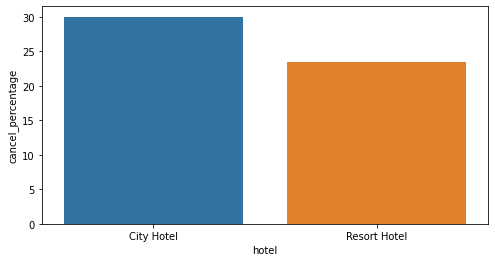

In [56]:
#Providing size to barplot
plt.figure(figsize = (8,4))
sns.barplot(x = z.index, y = z['cancel_percentage'])
plt.show()

In [57]:
#From above Analysis we can say that City Hotel bookings are more cancelled than Resort hotel

Q4) Find which distribution channel has longer average waiting time?

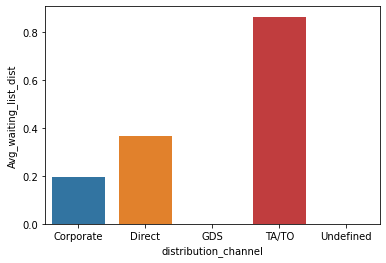

In [58]:
#Make group of distribution_channel and days_in_waiting_list ,find mean of days_in_waiting_list and rename column name
dist_long_wait=hotel1.groupby('distribution_channel')['days_in_waiting_list'].mean().reset_index()
dist_long_wait

#Convert to DataFrame and rename column 
dist_long_wait_avg=pd.DataFrame(dist_long_wait).rename(columns={'days_in_waiting_list':'Avg_waiting_list_dist'})

#providing size to barplot and show barplot
plt.figure(figsize=(6,4))
sns.barplot(x=dist_long_wait_avg['distribution_channel'],y=dist_long_wait_avg['Avg_waiting_list_dist'])
plt.show()

In [59]:
#From above Analysis we can say that TA/TO distribution channel having longer waiting time compaired to Corporate and Direct

Q5)Which month hotel have high revenue?

In [60]:
#Making list of months available in year
month_in_year=['January', 'February','March','April','May','June','July','August','September','October','November','December']

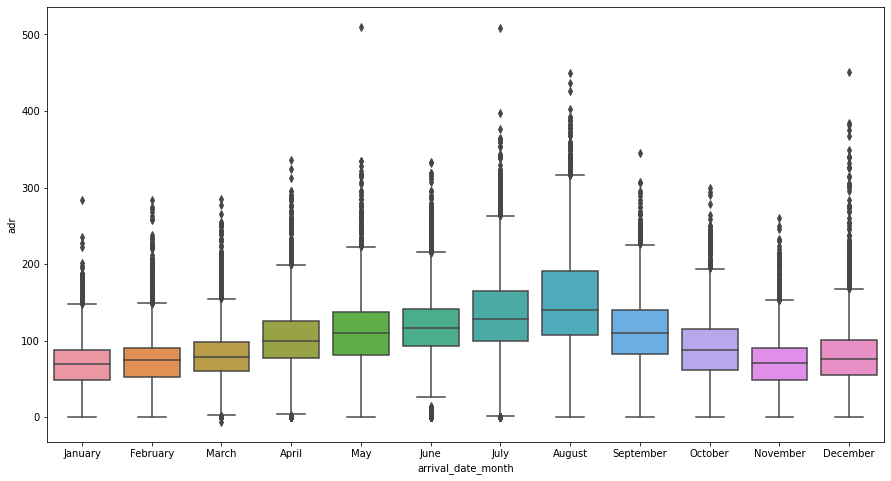

In [61]:
hotel1['arrival_date_month']=pd.Categorical(hotel1['arrival_date_month'],categories=month_in_year,ordered=True)

#providing size to figure 
plt.figure(figsize = (15,8))
#print on x-axis 'arrival_date_month' and y axis 'adr'
sns.boxplot(x = hotel1['arrival_date_month'],y = hotel1['adr'])
plt.show()

In [62]:
#From above Analysis we can say that less peoples are visited to Hotel in january month.so,revenue having huge cut off
#But,Hotel having large revenue in August month due to peoples more visited.

Q6) Which type of meal booked?

In [63]:
#Categories as per standard hospitality meal package 
# Undefined/SC — no meal package
# BB — Bed & Breakfast
# HB — Half board (breakfast and one other meal — usually dinner)
# FB — Full board (breakfast, lunch and dinner)

In [64]:
#Find meal count
hotel1.meal.value_counts()

BB           67977
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

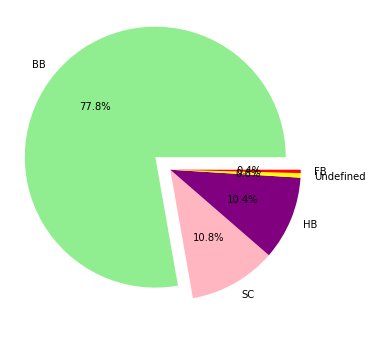

In [65]:
#determine size for figure
plt.rcParams['figure.figsize']=(8,6)

x_index = hotel1['meal'].value_counts().index.tolist()
y_percentage = hotel1['meal'].value_counts().tolist()

#Providing Colours for piechart
colours=('lightgreen','lightpink','purple','yellow','red')

#How much each section seprated from each other
explode=(0.15,0,0,0,0)

#Analysis by using pie chart
plt.pie(y_percentage,explode=explode,colors=colours,labels=x_index,autopct='%1.1f%%')
plt.show()

In [66]:
#From above analysis it is clear that BB.(i.e Bed & Breakfast) is most preferable type of meal for 77.8% guest

Q7)Find from which country most guest come?

In [67]:
#Lets analysis data of top 10 countries (According to no of Guest)
v_countries=hotel1[hotel1['is_canceled']==0]['country'].value_counts()[:10]
v_countries

PRT    17662
GBR     8448
FRA     7104
ESP     5390
DEU     4334
IRL     2348
ITA     1991
BEL     1670
NLD     1561
USA     1416
Name: country, dtype: int64

In [68]:
#reset index and rename two columns
v_countries=v_countries.reset_index().rename(columns= {'index':'country','country':'number_of_bookings'})
v_countries

,country,number_of_bookings
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
5,IRL,2348
6,ITA,1991
7,BEL,1670
8,NLD,1561
9,USA,1416


In [69]:
#creating new column percentage 
#Mathematics formula:percentage=(value/totle value)*100

v_countries['percentage']=(v_countries['number_of_bookings']/v_countries['number_of_bookings'].sum())*100
v_countries

,country,number_of_bookings,percentage
0,PRT,17662,34.015099
1,GBR,8448,16.269933
2,FRA,7104,13.681535
3,ESP,5390,10.380556
4,DEU,4334,8.346815
5,IRL,2348,4.521994
6,ITA,1991,3.834450
7,BEL,1670,3.216239
8,NLD,1561,3.006317
9,USA,1416,2.727063


[Text(0.5, 1.0, '% Guest per country')]

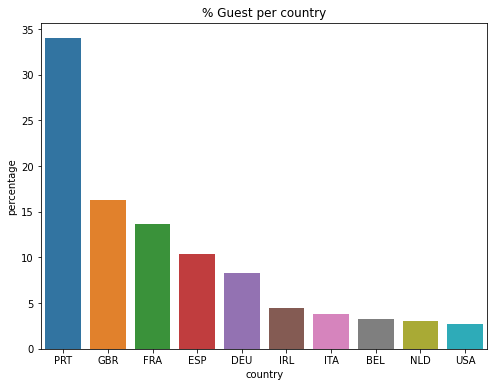

In [70]:
#Analysis by using bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='country',y='percentage',data=v_countries).set(title='% Guest per country')

In [71]:
#From above Analysis it is clear that most of the peoples are come from PRT (i.e.Portugal)

Q8)Find yearwise booking of hotel?

In [72]:
hotel1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [73]:
yearly_count_hotel=hotel1['arrival_date_year'].value_counts()
yearly_count_hotel

2016    42390
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

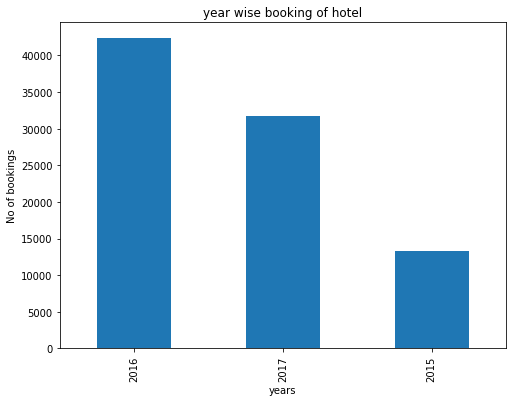

In [74]:
plt.figure(figsize=(8,6))
yearly_count_hotel.plot.bar()
plt.xlabel('years')
plt.ylabel('No of bookings')
plt.title('year wise booking of hotel')
plt.show()

In [75]:
#From Above Graph it is clear that year 2016 having higher bookings compaired to year 2017 and 2015.
#so,according to given data there is increment of booking with alternate years